In [1]:
import requests
import json
import matplotlib.pyplot as plt
from xgrads import open_CtlDataset
import ulmo
import pandas as pd
import geopandas as gpd
from shapely import geometry as sgeom
from collections import OrderedDict
import numpy as np
from rasterstats import point_query
from datetime import datetime, timedelta, date
import xarray as xr

In [2]:
domain = 'WY'
mode = 'all'
stdt = '2018-10-01'
eddt = '2019-09-30'

In [3]:
# function to edit text files
def replace_line(file_name, line_num, text):
    ''' 
    file_name = file to edit
    line_num = line number in file to edit
    text = nex text to put in
    '''
    lines = open(file_name, 'r').readlines()
    lines[line_num] = text
    out = open(file_name, 'w')
    out.writelines(lines)
    out.close()

In [4]:
ctlFile = '/nfs/attic/dfh/Aragon2/CSOgdat/'+domain+'/swed.ctl'

# #op1 assim SM run 
# text = 'DSET ^snotel_op_allCSO_swed.gdat\n'
# replace_line(ctlFile, 0, text)
# op1 = open_CtlDataset(ctlFile)

# # #op2 assim SM run 
# text = 'DSET ^snotel_op_deltaCSO_swed.gdat\n'
# replace_line(ctlFile, 0, text)
# op2 = open_CtlDataset(ctlFile)

#baseline SM run 
text = 'DSET ^baseline_swed.gdat\n'
replace_line(ctlFile, 0, text)
baseswe = open_CtlDataset(ctlFile)

# # #cso assim SM run 
# text = 'DSET ^cso_'+mode+'_swed.gdat\n'
# replace_line(ctlFile, 0, text)
# csoswe = open_CtlDataset(ctlFile)

# # # #snotel assim SM run 
# text = 'DSET ^snotel_'+mode+'_swed.gdat\n'
# replace_line(ctlFile, 0, text)
# snotelswe = open_CtlDataset(ctlFile)

#both assim SM run 
text = 'DSET ^both_'+mode+'_swed.gdat\n'
replace_line(ctlFile, 0, text)
bothswe = open_CtlDataset(ctlFile)

In [170]:
bothswe

,Array,Chunk
Bytes,1.42 GB,3.89 MB
Shape,"(365, 1012, 960)","(1, 1012, 960)"
Count,730 Tasks,365 Chunks
Type,float32,numpy.ndarray


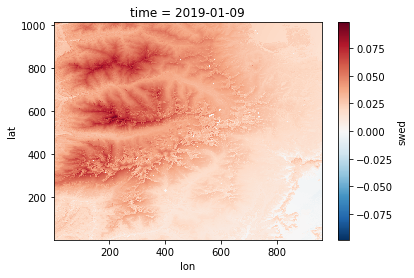

In [171]:
(bothswe.swed.isel(time = 100)-baseswe.swed.isel(time = 100)).plot()

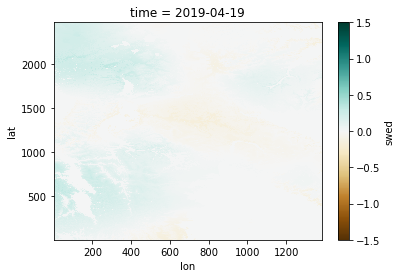

In [5]:
i = 200
(bothswe.swed.isel(time = i)-baseswe.swed.isel(time = i)).plot(cmap='BrBG',vmin = -1.5,vmax=1.5)

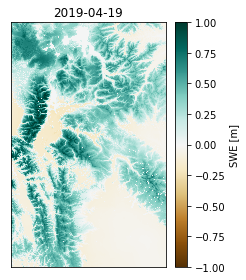

In [40]:
i = 200
# plot georeferenced SnowModel output with SNOTEL stations 
fig, axes = plt.subplots(figsize=(3.3,4))
fig.subplots_adjust(hspace = .5, wspace=1)

#plot anomaly of both assm - base
im = (bothswe.swed.isel(time = i)-baseswe.swed.isel(time = 100)).plot(cmap='BrBG',vmin = -1,vmax=1,add_colorbar=False)
plt.title(np.datetime_as_string(bothswe.time[i].values, unit='D'))
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
cb = plt.colorbar(im, pad=0.05)
cb.set_label(label='SWE [m]')
plt.tight_layout()
fig.savefig(f"/nfs/attic/dfh/Aragon2/CSOfigs/assim_animation2/Python_Animation_frame_{i:04}.png",dpi=300)
plt.close()

In [41]:
for i in range(len(baseswe.time)):
    print(i)
    # plot georeferenced SnowModel output with SNOTEL stations 
    fig, axes = plt.subplots(figsize=(3.3,4))
    fig.subplots_adjust(hspace = .5, wspace=1)

    #plot anomaly of both assm - base
    im = (bothswe.swed.isel(time = i)-baseswe.swed.isel(time = i)).plot(cmap='BrBG',vmin = -1,vmax=1,add_colorbar=False)
    plt.title(np.datetime_as_string(bothswe.time[i].values, unit='D'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    cb = plt.colorbar(im, pad=0.05)
    cb.set_label(label='SWE [m]')
    plt.tight_layout()
    fig.savefig(f"/nfs/attic/dfh/Aragon2/CSOfigs/assim_animation2/Python_Animation_frame_{i:04}.png",dpi=300)
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

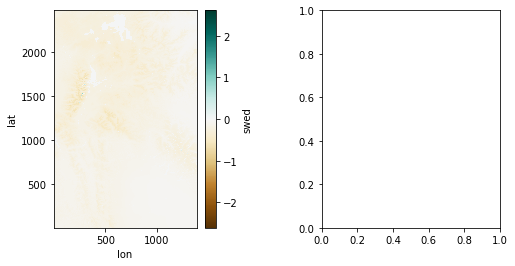

In [56]:
for i in range(len(baseswe.time)):
    print(i)
    # plot georeferenced SnowModel output with SNOTEL stations 
    fig, axes = plt.subplots(figsize=(8,4),ncols=2)
    fig.subplots_adjust(hspace = .2, wspace=.5)

    #plot anomaly of snotel assm - base
    (bothswe.swed.isel(time = i)-baseswe.swed.isel(time = i)).plot(ax=axes[0],cmap='BrBG',vmin = -1,vmax=1)
    #plot anomaly of both assm - base
    (snotelswe.swed.isel(time = i)-baseswe.swed.isel(time = i)).plot(ax=axes[1],cmap='BrBG',vmin = -1,vmax=1)
    
    fig.savefig(f"/nfs/attic/dfh/Aragon2/CSOfigs/assim_animation/Python_Animation_frame_{i:04}.png",dpi=300)
    plt.close()

In [42]:
PNGpath = '/nfs/attic/dfh/Aragon2/CSOfigs/assim_animation2/Python_Animation_frame*.png'
GIFpath = '/nfs/attic/dfh/Aragon2/CSOfigs/assim_animation2/SM_Animation_baseline_v_both.gif'
# make the movie
!convert $PNGpath $GIFpath

In [43]:
# make the movie
!convert $PNGpath $GIFpath

# GEE style animation

In [5]:
import contextily as ctx
import requests

#path to CSO domains
domains_resp = requests.get("https://raw.githubusercontent.com/snowmodel-tools/preprocess_python/master/CSO_domains.json")
domains = domains_resp.json()

#Snotel bounding box
Bbox = domains[domain]['Bbox']
xll = domains[domain]['xll']
yll = domains[domain]['yll']

# Snotel projection
stn_proj = domains[domain]['stn_proj']
# model projection
mod_proj = domains[domain]['mod_proj']

mod_proj

'epsg:32612'

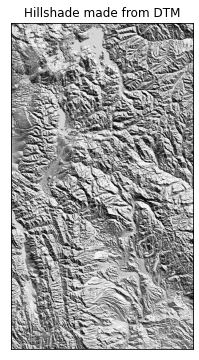

In [6]:
import rasterio as rio
import earthpy.spatial as es
import earthpy.plot as ep
pathToRaster = r'/nfs/attic/dfh/Aragon2/CSOdmn/'+domain+'/DEM_'+domain+'.tif'
# # Open into an xarray.DataArray
# geotiff_da = xr.open_rasterio(geotiff_path)
# # Covert our xarray.DataArray into a xarray.Dataset
# geotiff_ds = geotiff_da.to_dataset('band')
# # Rename the variable to a more useful name
# geotiff_ds = geotiff_ds.rename({1: 'elev'})
# geotiff_ds.elev.plot(cmap ='gray')

src = rio.open(pathToRaster)
bound = src.bounds
minx = bound[0]
miny = bound[1]
maxx = bound[2]
maxy = bound[3]

#with rio.open(dtm) as src:
elevation = src.read(1)

# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(10, 6)
)
plt.show()

In [11]:

for i in range(len(bothswe.time)):
    print(i)
    # plot georeferenced SnowModel output with SNOTEL stations 
    fig, axes = plt.subplots(figsize=(6,8))
    #fig, axes = plt.subplots(figsize=(6,6))
    fig.subplots_adjust(hspace = .5, wspace=1)

    #hillshade and elevation
    axes.imshow(np.flipud(hillshade),cmap ='gray')
    axes.imshow(np.flipud(elevation),cmap ='gray', alpha = 0.7)

    #axes.imshow(np.flipud(ghent_img))

    #plot anomaly of both assm - base
    # im = bothswe.swed.where(bothswe.swed>0.01).isel(time = i).plot(cmap='plasma',vmin = 0,vmax=2,alpha =0.6,add_colorbar=False,ax=axes)
    im = bothswe.swed.where(bothswe.swed>0.01).isel(time = i).plot(cmap=plt.cm.get_cmap('Blues',8),vmin = 0,vmax=1.6,alpha =0.6,add_colorbar=False,ax=axes)
    #axes.imshow(im,cmap='plasma',vmin = 0,vmax=2,alpha =0.9)
    plt.title(np.datetime_as_string(bothswe.time[i].values, unit='D'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    cb = plt.colorbar(im, pad=0.05)
    cb.set_label(label='SWE [m]')
    plt.tight_layout()
    #fig.savefig(f"test_swe5.png",dpi=300)
    fig.savefig(f"/nfs/attic/dfh/Aragon2/CSOfigs/"+domain+f"/swe_mov2/Python_Animation_frame_{i:04}.png",dpi=300)
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
PNGpath = '/nfs/attic/dfh/Aragon2/CSOfigs/'+domain+'/swe_mov2/Python_Animation_frame*.png'
GIFpath = '/nfs/attic/dfh/Aragon2/CSOfigs/'+domain+'/swe_mov2/SM_Animation_both.gif'
# make the movie
!convert $PNGpath $GIFpath

In [187]:
for i in range(len(bothswe.time)):
    # plot georeferenced SnowModel output with SNOTEL stations 
    print(i)
    fig, axes = plt.subplots(figsize=(6,8))
    fig.subplots_adjust(hspace = .5, wspace=1)

    #hillshade and elevation
    axes.imshow(np.flipud(hillshade),cmap ='gray')
    axes.imshow(np.flipud(elevation),cmap ='gray', alpha = 0.7)

    #axes.imshow(np.flipud(ghent_img))

    #plot anomaly of both assm - base
    dif = (bothswe.swed.isel(time = i)-baseswe.swed.isel(time = i))
    im = dif.where((dif>0.025)|(dif<-0.025)).plot(cmap='BrBG',vmin = -.5,vmax=.5,add_colorbar=False,alpha = 0.6)
    plt.title(np.datetime_as_string(bothswe.time[i].values, unit='D'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    cb = plt.colorbar(im, pad=0.05)
    cb.set_label(label='SWE [m]')
    plt.tight_layout()
    #fig.savefig(f"test_swe4.png",dpi=300)
    fig.savefig(f"/nfs/attic/dfh/Aragon2/CSOfigs/"+domain+f"/delta_swe_mov/Python_Animation_frame_{i:04}.png",dpi=300)
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [188]:
PNGpath = '/nfs/attic/dfh/Aragon2/CSOfigs/'+domain+'/delta_swe_mov/Python_Animation_frame*.png'
GIFpath = '/nfs/attic/dfh/Aragon2/CSOfigs/'+domain+'/delta_swe_mov/SM_Animation_baseline_v_both.gif'
# make the movie
!convert $PNGpath $GIFpath

# add SAT base layer 

In [123]:
from contextily.tile import warp_img_transform, warp_tiles, _warper
from rasterio.plot import show as rioshow
ghent_img, ghent_ext = ctx.bounds2img(Bbox['lonmin'],
                                     Bbox['latmin'],
                                     Bbox['lonmax'],
                                     Bbox['latmax'],
                                     ll=True,
                                     source=ctx.providers.Esri.WorldImagery
                                    )
f, ax = plt.subplots(1, figsize=(9, 9))
ax.imshow(ghent_img, extent=ghent_ext)
# #transform img
# w_img, w_transform = warp_img_transform(ghent_img,
#                                         src.transform,
#                                         src.crs,
#                                         "EPSG:4326"
#                                        )

# f, ax = plt.subplots(1)
# rioshow(w_img, transform=w_transform, ax=ax);

In [ ]:
https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/plotting-extents/

In [96]:
#pull out of xarray
sw = bothswe.swed.values

In [107]:
str(bothswe.time.values[0])[0:10]

'2018-10-01'

Text(0.5, 1.0, 'Date = 2018-10-01')

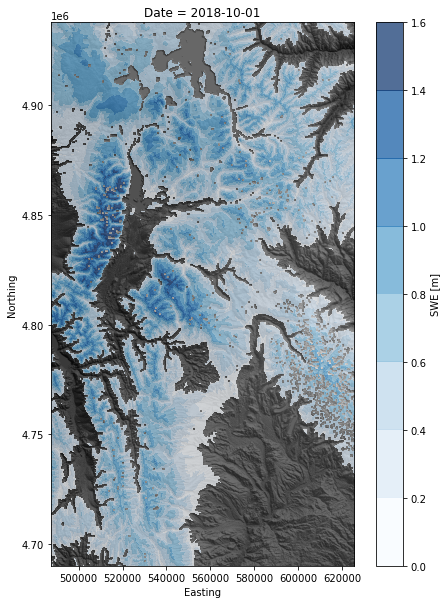

In [115]:
i=200
# plot georeferenced SnowModel output with SNOTEL stations 
fig, ax = plt.subplots(1,figsize=(8,10))

#hillshade and elevation
ax.imshow(np.flipud(hillshade), origin = [xll,yll], extent = [minx,maxx,miny,maxy],cmap ='gray')
ax.imshow(np.flipud(elevation), origin = [xll,yll], extent = [minx,maxx,miny,maxy],cmap ='gray', alpha = 0.7)
#ax.imshow(np.flipud(ghent_img), origin = [xll,yll], extent = [minx,maxx,miny,maxy])
#add model output
inswe = np.squeeze(sw[i,:,:])
b = np.ma.masked_where(inswe< 0.01, inswe)
snow = ax.imshow(b, origin = [xll,yll], extent = [minx,maxx,miny,maxy],cmap =plt.cm.get_cmap('Blues',8),alpha = 0.7)
snow.set_clim(0,1.6)

#     #remove tickmarks and tick labels
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)

ax.set_xlabel('Easting')
ax.set_ylabel('Northing')

#colorbar
ax_cbar =plt.colorbar(snow,orientation="vertical")#, fraction=0.07)
ax_cbar.set_label('SWE [m]')

#date title
plt.title("Date = " + str(bothswe.time.values[0])[0:10])



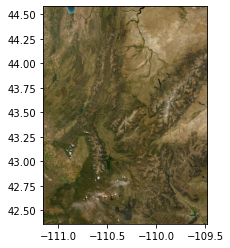

In [60]:
fig, axes = plt.subplots(figsize=(3.3,4))
fig.subplots_adjust(hspace = .5, wspace=1)

axes.imshow(ghent_img,origin = [xll,yll], extent = [Bbox['lonmin'],Bbox['lonmax'],Bbox['latmin'],Bbox['latmax']])
#ctx.add_basemap(axes,ghent_img)

/nfs/attic/dfh/miniconda/envs/snowmodelcal/lib/python3.6/site-packages/contextily/tile.py:238: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  auto_zoom = zoom == "auto"


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

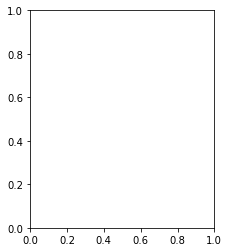

In [48]:
fig, axes = plt.subplots(figsize=(3.3,4))
fig.subplots_adjust(hspace = .5, wspace=1)

ctx.add_basemap(axes,ghent_img)